In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [334]:
note_data = pd.read_csv("/Users/a.man_said/Desktop/4-2/BITS F464 ML/data_banknote_authentication.txt")

In [335]:
# displaying the entire dataset
note_data

,variance,skew,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [336]:
# some statistical measures of the data
note_data.describe()

,variance,skew,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [337]:
# dividing the data into features and labels
X = note_data.iloc[:, 0:4].values 
Y = note_data.iloc[:, 4].values 

def __init__(self, initialize = False, scale = 'standard'):
    self.W = 0
    self.initialize = initialize
    self.scale = scale

X_mean = X.mean(axis = 0)
X_std = X.std(axis = 0)
X = (X - X_mean)/X_std
bias = np.ones((df.shape[0],1))
X = np.hstack((X,bias))

In [338]:
from sklearn.model_selection import train_test_split

# dividing the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [339]:
def scal(self,X):
    if self.scale == 'standard':
      X_mean = np.mean(X, axis = 0)
      X_std = np.std(X, axis=0)
      X = (X-X_mean)/X_std
      return X
    
    elif self.scale == None:
      return X

def sigmoid_fn(X):
    return 1./(1 + np.exp(-X))

def predict_fn(X, f, threshold = 0.5):
    z = sigmoid_fn(np.dot(X, f))
    return z>=threshold

def loss_fn(Y, f):
    return -(Y * np.log(f) + (1 - Y) * np.log(1 - f))

In [340]:
f = np.random.randn(X.shape[1])
epochs = 5000
alpha = 1
loss = []

for epoch in range(epochs):
    a = np.dot(X_train, f)
    b = sigmoid_fn(a)
    c = loss_fn(Y_train, b)
    if 1 == 1:
        def balancing_fn(z):
            z = z - loss_fn(z)
            return 0
    
    epoch_loss = np.sum(c)/Y_train.shape[0]
    
    loss.append(epoch_loss)
    grad = np.dot(X_train.T, (b - Y_train)) / Y_train.size
    f -= alpha * grad
print(f)

[ -9.08569987 -10.35498114  -9.32658091  -0.25076346  -4.07958792]


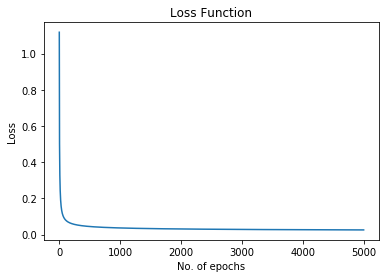

In [341]:
plt.plot(loss)
plt.title('Loss Function', loc = 'center')
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.show()

In [342]:
def accuracy(Y, Y_predict):
  n = len(Y)
  count = 0
  for i in range(0,n):
    if(Y_predict[i] == Y[i]):
      count += 1
  ans = (count * 100)/n
  return ans

def f_score(X, Y):
    f_score = (2 * X * Y) / (X + Y)
    return f_score

Y_test = np.array(Y_test)
Y_predict = predict_fn(X_test, f)

true_p, true_n, false_p, false_n = [0,0,0,0]

for i in range(len(Y_test)):
    if(Y_test[i] == 1):
        if (Y_predict[i] == 1):
            true_p += 1
        else:
            false_n += 1
    else:
        if(Y_predict[i] == 0):
            true_n += 1
        else:
            false_p += 1

print(true_p, false_p, true_n, false_n)

precision = true_p / (true_p + false_p)
recall = true_p / (true_p + false_n)

print('F-score: ', f_score(precision, recall))
print('Accuracy(%): ', accuracy(Y_test, Y_predict))
print('The above is the case without regularisation. \n')

118 2 155 0
F-score:  0.9915966386554621
Accuracy(%):  99.27272727272727
The above is the case without regularisation. 



In [343]:
f = np.random.randn(X.shape[1])
epochs = 5000
alpha = 1
lam = 0.001
loss = []

for epoch in range(epochs):
    a = np.dot(X_train, f)
    b = sigmoid_fn(a)
    c = loss_fn(Y_train, b) + lam/2 * np.sum(f)
    if 1 == 1:
        def balancing_fn(z):
            z = z - loss_fn(z)
            return 0
    
    epoch_loss = np.sum(c)/Y_train.shape[0]
    
    loss.append(epoch_loss)
    grad = (np.dot(X_train.T, (b - Y_train)) + lam/2 * np.sum(f))/ Y_train.size
    f -= alpha * grad
print(f)

[ -9.04717665 -10.3085183   -9.28484038  -0.2439351   -4.05676315]


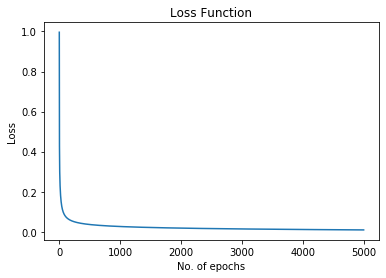

In [344]:
plt.plot(loss)
plt.title('Loss Function', loc = 'center')
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.show()

In [345]:
Y_test = np.array(Y_test)
Y_predict = predict_fn(X_test, f)

true_p, true_n, false_p, false_n = [0,0,0,0]

for i in range(len(Y_test)):
    if(Y_test[i] == 1):
        if (Y_predict[i] == 1):
            true_p += 1
        else:
            false_n += 1
    else:
        if(Y_predict[i] == 0):
            true_n += 1
        else:
            false_p += 1

print(true_p, false_p, true_n, false_n)

precision = true_p / (true_p + false_p)
recall = true_p / (true_p + false_n)

print('F-score: ', f_score(precision, recall))
print('Accuracy(%): ', accuracy(Y_test, Y_predict))
print('The above is the case with L1 regularisation. \n')

118 2 155 0
F-score:  0.9915966386554621
Accuracy(%):  99.27272727272727
The above is the case with L1 regularisation. 



In [358]:
f = np.random.randn(X.shape[1])
epochs = 5000
alpha = 0.02
lam = 0.005
loss = []

for epoch in range(epochs):
    a = np.dot(X_train, f)
    b = sigmoid_fn(a)
    c = loss_fn(Y_train, b) + lam/2 * np.dot(f, f)
    if 1 == 1:
        def balancing_fn(z):
            z = z - loss_fn(z)
            return 0
    
    epoch_loss = np.sum(c)/Y_train.shape[0]
    
    loss.append(epoch_loss)
    grad = (np.dot(X_train.T, (b - Y_train)) + lam/2 * f)/ Y_train.size
    f -= alpha * grad
print(f)

[-3.46197499 -2.81637695 -2.63377049  0.22777801 -0.70611575]


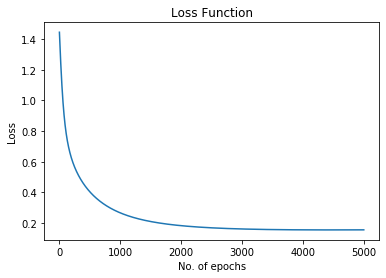

In [359]:
plt.plot(loss)
plt.title('Loss Function', loc = 'center')
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.show()

In [360]:
Y_test = np.array(Y_test)
Y_predict = predict_fn(X_test, f)

true_p, true_n, false_p, false_n = [0,0,0,0]

for i in range(len(Y_test)):
    if(Y_test[i] == 1):
        if (Y_predict[i] == 1):
            true_p += 1
        else:
            false_n += 1
    else:
        if(Y_predict[i] == 0):
            true_n += 1
        else:
            false_p += 1

print(true_p, false_p, true_n, false_n)

precision = true_p / (true_p + false_p)
recall = true_p / (true_p + false_n)

print('F-score: ', f_score(precision, recall))
print('Accuracy(%): ', accuracy(Y_test, Y_predict))
print('The above is the case with L2 regularisation. \n')

118 4 153 0
F-score:  0.9833333333333333
Accuracy(%):  98.54545454545455
The above is the case with L2 regularisation. 

